In [2]:
# Import generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import librosa
import IPython.display as ipd

x, sr = librosa.load('speech.wav')
ipd.Audio(x, rate=sr)

In [5]:
from pydub import AudioSegment

In [6]:
# Load files
audio_segment = AudioSegment.from_file("speech.wav")

# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 48000
Frame width: 4
Length (ms): 15000
Frame count: 720000.0
Intensity: -36.666097171717716


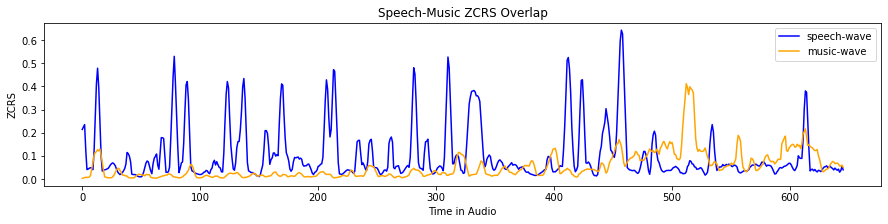

In [14]:
y, sr = librosa.load('speech.wav')
x, sr = librosa.load('music.wav')
zcrsY = librosa.feature.zero_crossing_rate(y)
zcrsX = librosa.feature.zero_crossing_rate(x)
plt.figure(figsize=(15, 3))
plt.plot(zcrsY[0],c='blue', label="speech-wave")
plt.plot(zcrsX[0],c='orange',label="music-wave")
plt.xlabel("Time in Audio")
plt.ylabel("ZCRS")
plt.title('Speech-Music ZCRS Overlap')
plt.legend()

In [110]:
x, sr = librosa.load('speech.wav')
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=40)

In [111]:
print(mfccs)
print(mfccs.shape)

[[-438.86746    -435.31528    -453.32874    ... -409.94424
  -401.25604    -342.0946    ]
 [ 137.51968     127.11262     121.61441    ...  228.20406
   215.5824      139.97952   ]
 [   1.0243015     1.3891889    -0.6504691  ...  -31.390888
   -49.218933     -8.690208  ]
 ...
 [  -0.74949753   -2.6582706    -4.1082883  ...   -6.85629
    -7.639349     -2.7211676 ]
 [  -2.3174653    -2.050534     -2.1648405  ...   -0.901592
    -2.368515     -2.1410685 ]
 [  -3.8112087    -4.559393     -9.118191   ...   -4.2521973
    -6.322606     -4.2901087 ]]
(40, 646)


In [112]:
x, sr = librosa.load('speech.wav')
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)
print(chromagram)
print(chromagram.shape)

[[0.31663305 0.10603265 0.14380802 ... 0.41846642 0.24625653 0.69235873]
 [0.9040313  0.88793135 1.         ... 1.         1.         1.        ]
 [0.7441715  0.7792307  0.69300765 ... 0.3160808  0.39528522 0.55782944]
 ...
 [0.27390534 0.09420351 0.04399423 ... 0.71854454 0.6873656  0.82474864]
 [0.26076064 0.12476663 0.06943532 ... 0.32317844 0.539134   0.8616575 ]
 [0.1830943  0.05064488 0.01924173 ... 0.20930189 0.17640157 0.6943038 ]]
(12, 646)


In [133]:
import os
features=[]
directory = "speech-full"    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
        inner_features = []
        y, sr = librosa.load(directory+'/'+filename)
        class_label="0"
        zcrs = librosa.feature.zero_crossing_rate(y)
        mfccs = librosa.feature.mfcc(y, sr=sr,n_mfcc=40)
        chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        features.append([np.mean(zcrs),np.mean(mfccs),np.mean(chromagram),
                         np.mean(rmse),np.mean(spec_cent),np.mean(spec_bw),
                         np.mean(rolloff),class_label])
     else:
        print("here")
        continue
print("done")

here
done


In [135]:
import os
directory = "music-full"    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
        inner_features = []
        y, sr = librosa.load(directory+'/'+filename)
        class_label="Music"
        zcrs = librosa.feature.zero_crossing_rate(y)
        mfccs = librosa.feature.mfcc(y, sr=sr,n_mfcc=40)
        chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        features.append([np.mean(zcrs),np.mean(mfccs),np.mean(chromagram),
                         np.mean(rmse),np.mean(spec_cent),np.mean(spec_bw),
                         np.mean(rolloff),class_label])
     else:
        print("here")
        continue
print("done")
featuresdf = pd.DataFrame(features, columns=['zcrs','mfccs','chroma','rmse','spec_c',
                                             'spec_b','rolloff','class_label'])
featuresdf.head()

here
done


,zcrs,mfccs,chroma,rmse,spec_c,spec_b,rolloff,class_label
0,0.150044,-8.459356,0.388125,0.037607,2612.358748,2139.577794,4620.238729,Human-Speech
1,0.123951,-7.779772,0.405367,0.054338,2159.300344,1991.255180,3995.042509,Human-Speech
2,0.126048,-7.293183,0.392444,0.077955,2331.708888,1989.404083,4185.341358,Human-Speech
3,0.130438,-7.762571,0.391101,0.078373,2559.056275,2167.557466,4626.722023,Human-Speech
4,0.171725,-6.814230,0.373968,0.096997,2896.593739,2300.030596,5117.652388,Human-Speech


In [136]:
import csv
header=['zcrs','mfccs','chroma','rmse','spec_c','spec_b','rolloff','class_label']
with open('music.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write multiple rows
    writer.writerows(features)